In [9]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [10]:
df = pd.read_csv(r'../Files/union.csv', index_col=0)

In [113]:
duplicados = df[df.duplicated(keep=False)]
duplicados.head(10)

,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_Imputed
Year,,,,,,,,,,,,,,,,,,,,,,,
2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,0,0,63253
2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,Married,Star,34090.04,2018 Promotion,2018,3,0,0,69841
2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,High School or Below,Single,Nova,4770.55,Standard,2012,11,0,0,45229
2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,Married,Nova,7482.64,Standard,2012,11,0,0,50688
2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Master,Married,Star,8382.63,Standard,2018,11,0,0,101038
2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,Single,Nova,13916.93,Standard,2018,9,0,0,70267
2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,Married,Aurora,6265.34,Standard,2017,1,0,0,73479
2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,Married,Aurora,6265.34,Standard,2017,1,0,0,73479
2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P5S 6R4,Female,Bachelor,Divorced,Nova,7166.34,Standard,2018,1,0,0,75265


## NULOS 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 2017 to 2018
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Month                        405624 non-null  int64  
 1   Flights Booked               405624 non-null  int64  
 2   Flights with Companions      405624 non-null  int64  
 3   Total Flights                405624 non-null  int64  
 4   Distance                     405624 non-null  int64  
 5   Points Accumulated           405624 non-null  float64
 6   Points Redeemed              405624 non-null  int64  
 7   Dollar Cost Points Redeemed  405624 non-null  int64  
 8   Country                      405624 non-null  object 
 9   Province                     405624 non-null  object 
 10  City                         405624 non-null  object 
 11  Postal Code                  405624 non-null  object 
 12  Gender                       405624 non-null  object 
 13  Edu

# --> SALARY

Se puede ver que en el campo de Educación no hay valores nulos, pero en salario si. 

In [28]:
df['Salary'].isnull().sum()

np.int64(102672)

In [32]:
df['Salary'].value_counts(normalize=True, dropna=False)*100


Salary
NaN         25.312112
101933.0     0.136087
62283.0      0.082835
61809.0      0.082835
51573.0      0.082835
              ...    
46008.0      0.005917
78925.0      0.005917
50570.0      0.005917
103563.0     0.005917
56345.0      0.005917
Name: proportion, Length: 5891, dtype: float64

In [ ]:
#para verlo mejor
nulos_salary = df['Salary'].isnull().sum()
total_filas = len(df)
porcentaje_nulos = (nulos_salary / total_filas) * 100
print(f"Porcentaje de nulos en 'Salary': {porcentaje_nulos:.2f}%")

Porcentaje de nulos en 'Salary': 25.31%


In [34]:
df[['Education','Salary']]

,Education,Salary
Year,,
2017,Bachelor,92552.0
2017,College,NaN
2017,College,NaN
2017,Bachelor,63253.0
2017,Bachelor,91163.0
...,...,...
2018,College,NaN
2018,Doctor,217943.0
2018,Bachelor,47670.0


In [11]:
df.median_salary = df.groupby('Education')['Salary'].median().reset_index().rename(columns={'Salary': 'Median_Salary'})

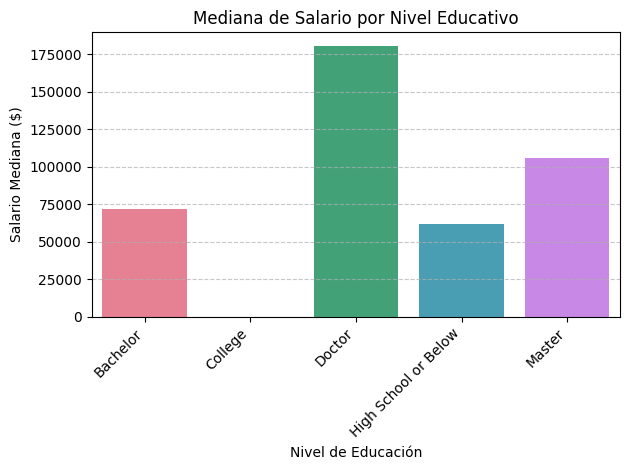

In [14]:
sns.barplot(x='Education', y='Median_Salary',data=df.median_salary, palette='husl')
plt.title('Mediana de Salario por Nivel Educativo')
plt.xlabel('Nivel de Educación')
plt.ylabel('Salario Mediana ($)')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

Los niveles educativos más altos, tienen la mediana de salario mucho más alta que los estudios más bajos

In [20]:
df['Education'].value_counts().isna()


Education
Bachelor                False
College                 False
High School or Below    False
Doctor                  False
Master                  False
Name: count, dtype: bool

In [62]:
def exploracion_num(dataframe, col):

    print(f"El mínimo de {col} es: {dataframe[col].min()}")
    print(f'El máximo de {col} es: {dataframe[col].max()}')
    print(f'La media de {col} es: {dataframe[col].mean()}')
    print(f'La mediana de {col} es: {dataframe[col].median()}')







In [43]:
exploracion_num(df,'Salary')   

El mínimo de Salary es: -58486.0
El máximo de Salary es: 407228.0
La media de Salary es: 79268.82595262615
La mediana de Salary es: 73479.0


Lo que llama la antención es que hay salario 'negativo'

In [44]:
mediana_global = df['Salary'].median()

In [45]:
mediana_condicional = df.groupby('Education')['Salary'].transform('median')

In [53]:
df['Salary_Imputed'] = df['Salary'].fillna(mediana_condicional)

In [54]:
df['Salary_Imputed'] = df['Salary_Imputed'].fillna(mediana_global)

In [55]:
condicion_negativo = (df['Salary_Imputed'] < 0)

In [56]:
df.loc[condicion_negativo, 'Salary_Imputed'] = mediana_global

In [57]:
df['Salary_Imputed'] = df['Salary_Imputed'].astype('int64')

In [66]:
print("--- Verificación de la Columna Limpia ---")
print(f"Nulos restantes en 'Salary_Imputed': {df['Salary_Imputed'].isnull().sum()}")
print(f"El nuevo Salario Mínimo es: {df['Salary_Imputed'].min()}")

--- Verificación de la Columna Limpia ---
Nulos restantes en 'Salary_Imputed': 0
El nuevo Salario Mínimo es: 15609


In [64]:
def exploracion_num(dataframe, col):

    print(f"El mínimo de {col} es: {dataframe[col].min()}")
    print(f'El máximo de {col} es: {dataframe[col].max()}')
    print(f'La media de {col} es: {dataframe[col].mean():.2f}')
    print(f'La mediana de {col} es: {dataframe[col].median():.2f}')

    plt.figure(figsize=(10, 5))
    sns.histplot(data=dataframe, x=col, kde=True, bins=50) # 'kde=True' añade una curva de densidad suave
    plt.title(f'Histograma de Frecuencia de {col} (Distribución)')
    plt.show()

  
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=dataframe, x=col)
    plt.title(f'Diagrama de Caja de {col} (Outliers)')
    plt.show()

El mínimo de Salary_Imputed es: 15609
El máximo de Salary_Imputed es: 407228
La media de Salary_Imputed es: 77932.31
La mediana de Salary_Imputed es: 73479.00


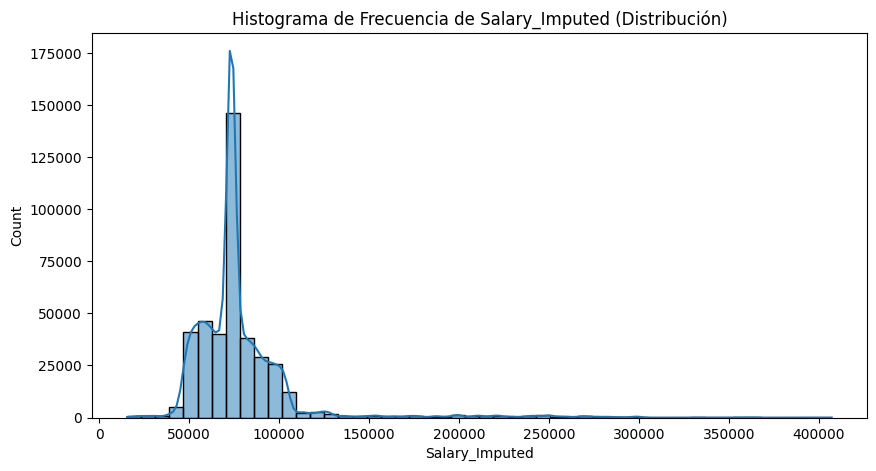

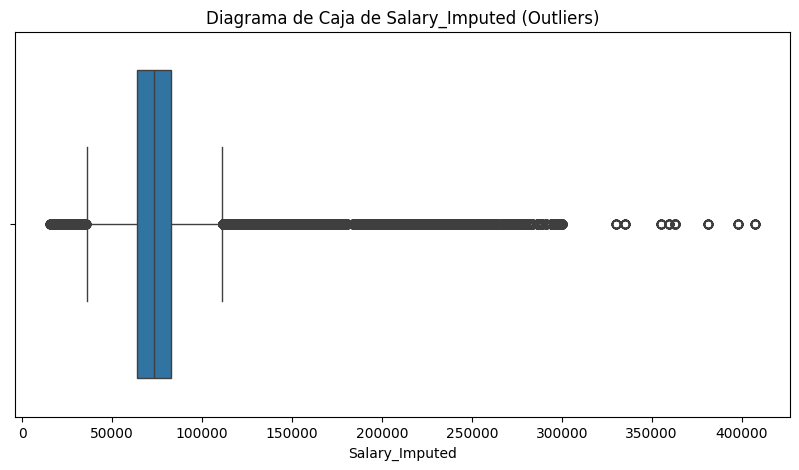

In [65]:
exploracion_num(df, 'Salary_Imputed')

En el histograma se observa un posible sesgo, lo que significa que la mayoría de los salarios están en el medio inferior. Por debajo de los 70.000$. También esta claro que se confirma que el pico esta en la mediana (73.479$)confirmando que es el valor más representativo. 

En el boxplot no se muestran puntos negativos pero sí valores atípicos a la derecha. Pero se deben mantener ya que representa a clientes con alto poder adquisitivo. 

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 2017 to 2018
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Month                        405624 non-null  int64  
 1   Flights Booked               405624 non-null  int64  
 2   Flights with Companions      405624 non-null  int64  
 3   Total Flights                405624 non-null  int64  
 4   Distance                     405624 non-null  int64  
 5   Points Accumulated           405624 non-null  float64
 6   Points Redeemed              405624 non-null  int64  
 7   Dollar Cost Points Redeemed  405624 non-null  int64  
 8   Country                      405624 non-null  object 
 9   Province                     405624 non-null  object 
 10  City                         405624 non-null  object 
 11  Postal Code                  405624 non-null  object 
 12  Gender                       405624 non-null  object 
 13  Edu

Procedo a eliminar Salary de la tabla ya que tengo una nueva colmna con el salario imputado


In [68]:
df.drop(columns=['Salary'], axis=1, inplace=True)

In [93]:

print("Columna 'Salary' eliminada. DataFrame actualizado:")
print(df.columns)

Columna 'Salary' eliminada. DataFrame actualizado:
Index(['Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Salary_Imputed'],
      dtype='object')


# --> Cancellation Month and Year

In [74]:
df['Cancellation Month'].unique()

array([nan,  3.,  9.,  2.,  7.,  6.,  8.,  4.,  1.,  5., 11., 12., 10.])

In [75]:
df['Cancellation Year'].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

Lo que podemos interpretar es que hay clientes que estan el programa de 'Loyalty' y que no han realizado ninguna cancelanción 

In [77]:
df['Loyalty Card'].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [79]:
df[['Loyalty Card', 'Cancellation Year']]

,Loyalty Card,Cancellation Year
Year,,
2017,Aurora,NaN
2017,Nova,NaN
2017,Nova,NaN
2017,Star,NaN
2017,Star,NaN
...,...,...
2018,Aurora,NaN
2018,Nova,NaN
2018,Nova,NaN


Relleno los valores nulos con un 0 porque el mes 0 no existe, de igual manera lo haré con 'Cancellation Year'

In [80]:
df['Cancellation Month'] = df['Cancellation Month'].fillna(0)

In [81]:
df['Cancellation Year'] = df['Cancellation Year'].fillna(0)

Estandarización a tipo entero 

In [82]:
df['Cancellation Month'] = df['Cancellation Month'].astype('int64')

In [83]:
df['Cancellation Year'] = df['Cancellation Year'].astype('int64')

In [92]:

print(" Verificación de Nulos y Tipos de Datos")
print(f"Nulos en Cancellation Month: {df['Cancellation Month'].isnull().sum()}")
print(f"Tipo de dato de Cancellation Month: {df['Cancellation Month'].dtype}")
print(f"Nulos en Cancellation Year: {df['Cancellation Year'].isnull().sum()}")
print(f"Tipo de dato de Cancellation Year: {df['Cancellation Year'].dtype}")

 Verificación de Nulos y Tipos de Datos
Nulos en Cancellation Month: 0
Tipo de dato de Cancellation Month: int64
Nulos en Cancellation Year: 0
Tipo de dato de Cancellation Year: int64


In [96]:
df.isna().sum()

Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Salary_Imputed                 0
dtype: int64

Verifico que no hay más datos nulos 

## VUELOS

In [97]:
df['Suma_Vuelos_Verificacion'] = df['Flights Booked'] + df['Flights with Companions']


In [102]:
df[['Suma_Vuelos_Verificacion', 'Flights Booked', 'Flights with Companions']]

,Suma_Vuelos_Verificacion,Flights Booked,Flights with Companions
Year,,,
2017,3,3,0
2017,14,10,4
2017,6,6,0
2017,0,0,0
2017,0,0,0
...,...,...,...
2018,0,0,0
2018,0,0,0
2018,3,3,0


In [105]:
df['Total Flights'] = df['Flights Booked'] + df['Flights with Companions']

In [108]:

inconsistencias_corregidas = df[df['Total Flights'] != (df['Flights Booked'] + df['Flights with Companions'])]

print("Verificación de la Corrección")
print(f"Total de registros inconsistentes después de la corrección: {len(inconsistencias_corregidas)}")

Verificación de la Corrección
Total de registros inconsistentes después de la corrección: 0


In [109]:
df.drop(columns=['Suma_Vuelos_Verificacion'], inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 2017 to 2018
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Month                        405624 non-null  int64  
 1   Flights Booked               405624 non-null  int64  
 2   Flights with Companions      405624 non-null  int64  
 3   Total Flights                405624 non-null  int64  
 4   Distance                     405624 non-null  int64  
 5   Points Accumulated           405624 non-null  float64
 6   Points Redeemed              405624 non-null  int64  
 7   Dollar Cost Points Redeemed  405624 non-null  int64  
 8   Country                      405624 non-null  object 
 9   Province                     405624 non-null  object 
 10  City                         405624 non-null  object 
 11  Postal Code                  405624 non-null  object 
 12  Gender                       405624 non-null  object 
 13  Edu

In [114]:
df.to_csv('datos_limpios.csv', index=False, encoding='utf-8')